<h1 align="center"> Assignment - 2 (Machine Learning) </h1>

<h2 align="left"> Logistic Regression </h2> 
<h4 align="right" > 
    Author: <a href="https://jimut123.github.io/">Jimut Bahan Pal </a>
</h4> 

#### As usual, importing the necessary libraries

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
sns.set()

## Part - A 

#### Generating artificial data from 2D Gaussian distributions (2 features) for 4 classes. Using the covariance matrices to be diagonal.

#### Generating for class 1

In [87]:
X1 = np.random.multivariate_normal(np.array([5,5]),np.array([[4,0],[0,1]]),200).reshape(200,2)
y1 = np.ones(200).reshape(200,1)
#d1 = np.concatenate([X1,y1],axis=1)

In [88]:
print(X1[:10])

[[6.15800284 5.25390779]
 [4.37160857 5.51356659]
 [2.79961531 4.37187844]
 [5.63815332 4.24687712]
 [5.0878123  3.43557235]
 [7.33542802 3.84149632]
 [7.38990623 3.9156539 ]
 [2.42661377 6.52785077]
 [7.19705672 4.97632857]
 [2.8238791  4.8109962 ]]


In [89]:
#print(d1[:10])

#### Generating for class 2

In [90]:
X2 = np.random.multivariate_normal(np.array([5,10]),np.array([[3,0],[0,1]]),200).reshape(200,2)
y2 = np.ones(200).reshape(200,1)*2
#d2 = np.concatenate([X2,y2],axis=1)

In [91]:
#d2[:20]

#### Generating for class 3

In [92]:
X3 = np.random.multivariate_normal(np.array([10,15]),np.array([[4,0],[0,4]]),200).reshape(200,2)
y3 = np.ones(200).reshape(200,1)*3
#d3 = np.concatenate([X3,y3],axis=1)

In [93]:
#d3[:20]

#### Generating for class 4

In [94]:
X4 = np.random.multivariate_normal(np.array([16,5]),np.array([[2,0],[0,2]]),200).reshape(200,2)
y4 = np.ones(200).reshape(200,1)*4
#d4 = np.concatenate([X4,y4],axis=1)

In [95]:
#d4[:20]

In [96]:
# full_dataset = np.append(d1,d2,axis=0)
# full_dataset = np.append(full_dataset,d3,axis=0)
# full_dataset = np.append(full_dataset,d4,axis=0)

In [97]:
# full_dataset[-20:]

#### Plotting the full dataset

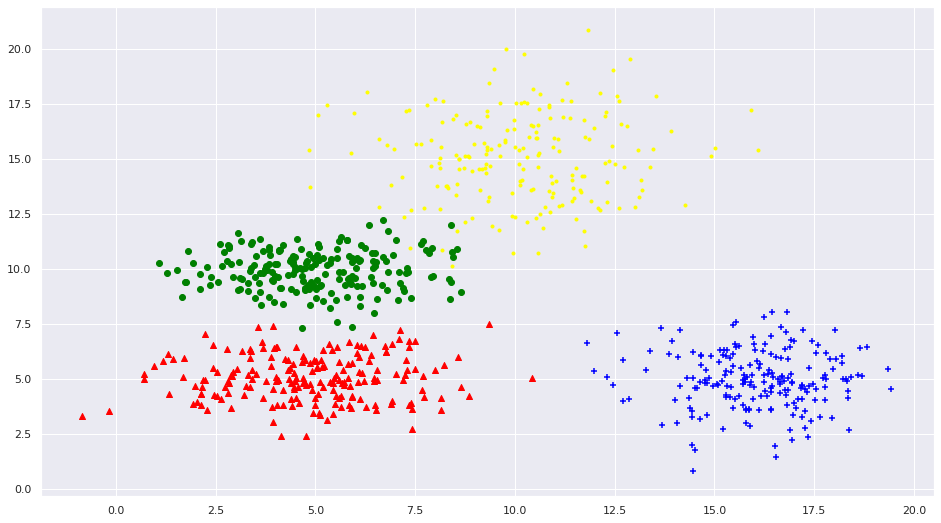

In [99]:
fig = plt.figure(figsize=(16,9))
#ax = plt.axes(projection='3d')
#ax.scatter(full_dataset[:,0],full_dataset[:,1], c=full_dataset[:,2], cmap='viridis', linewidth=0.5);
plt.scatter(list(X1[:,0]), list(X1[:,1]), marker='^',color='red')
plt.scatter(list(X2[:,0]), list(X2[:,1]), marker='o',color='green')
plt.scatter(list(X3[:,0]), list(X3[:,1]), marker='.',color='yellow')
plt.scatter(list(X4[:,0]), list(X4[:,1]), marker='+',color='blue')
plt.show()

In [100]:
X2[-40:].shape

(40, 2)

## Part - B

#### Dividing the data into training (80%) and test (20%) datasets. Total data = 200 for each class, so 160 for training and 40 for testing from each class

In [101]:
#X_train = []
# Split the data into training/testing sets
X_train = np.append(X1[:-40],X2[:-40],axis=0)
X_train = np.append(X_train,X3[:-40],axis=0)
X_train = np.append(X_train,X4[:-40],axis=0)
#X_test = list(X1[-40:])
X_test = np.append(X1[-40:],X2[-40:],axis=0)
X_test = np.append(X_test,X3[-40:],axis=0)
X_test = np.append(X_test,X4[-40:],axis=0)

y_train = np.append(y1[:-40],y2[:-40],axis=0)
y_train = np.append(y_train,y3[:-40],axis=0)
y_train = np.append(y_train,y4[:-40],axis=0)
#X_test = list(X1[-40:])
y_test = np.append(y1[-40:],y2[-40:],axis=0)
y_test = np.append(y_test,y3[-40:],axis=0)
y_test = np.append(y_test,y4[-40:],axis=0)



In [102]:
X_train.shape

(640, 2)

In [103]:
y_train.shape

(640, 1)

In [104]:
X_test.shape

(160, 2)

In [105]:
y_test.shape

(160, 1)

## Part - C

#### Training a Logistic Regression model on the data.

In [106]:
logreg = LogisticRegression(C=1e5)
# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X_train, y_train)


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Part - D

#### prediction

In [107]:
prediction = logreg.predict(X_test)
print(prediction)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


In [118]:
#print(y_test)

## Part - E 

#### Accuracy


 $Accuracy$ = $\frac{number of correct predictions}{total predictions}$

In [120]:
# no of correct predictions
cp=0
for x_,y_ in zip(prediction,y_test):
    #print(x_,y_)
    if x_ == y_:
        cp = cp+1
    else:
        print("prediction was class : ",int(x_)," but actual class is : ",int(y_))
print("\n\nNo of correct predictions = ",cp)

prediction was class :  1  but actual class is :  2
prediction was class :  3  but actual class is :  2


No of correct predictions =  158


In [115]:
accuracy = cp/prediction.size
print("accuracy : ",accuracy)

accuracy :  0.9875


## Part - F 

#### Plotting results (training data + predictions), predicted points have the same color with minor variations, and are a little bit bigger in size compared to the training data points

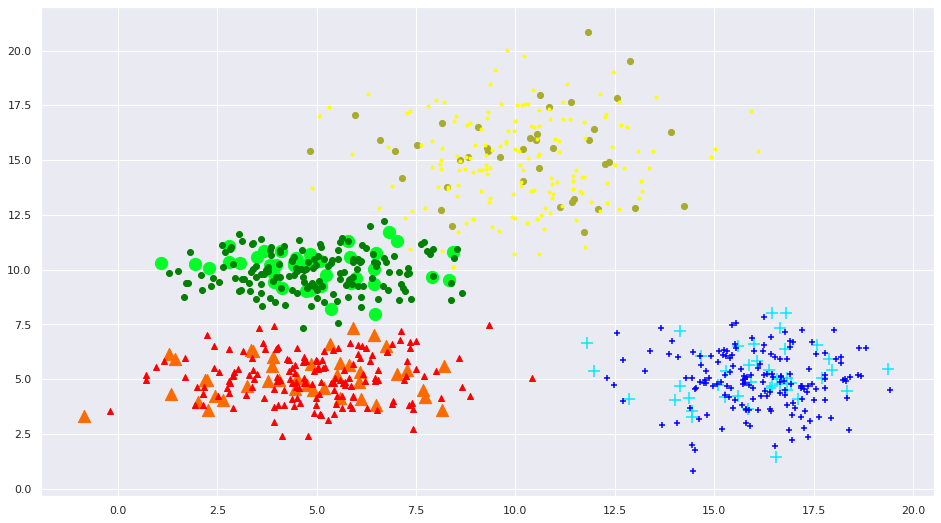

In [123]:
fig = plt.figure(figsize=(16,9))
#ax = plt.axes(projection='3d')
#ax.scatter(full_dataset[:,0],full_dataset[:,1], c=full_dataset[:,2], cmap='viridis', linewidth=0.5);
c = ['null','#fc6b03','#03fc28','#a7ab2e','#03e8fc']
m = ['null','^','o','.','+']
for x_,y_ in zip(X_test,prediction):
    #print(x_," - ",y_)    
    plt.scatter(x_[0], x_[1], marker=m[int(y_)],color=c[int(y_)],s=150)

plt.scatter(list(X1[:-40,0]), list(X1[:-40,1]), marker='^',color='red')
plt.scatter(list(X2[:-40,0]), list(X2[:-40,1]), marker='o',color='green')
plt.scatter(list(X3[:-40,0]), list(X3[:-40,1]), marker='.',color='yellow')
plt.scatter(list(X4[:-40,0]), list(X4[:-40,1]), marker='+',color='blue')
plt.show()


#### References

1. Dripta Maharaj, (2020), Slides, availabe on web <a href="https://sites.google.com/view/da220-2019-20"> https://sites.google.com/view/da220-2019-20 </a>, last accessed on 26.1.2020.


2. Unknown, (2019), Documentation for Numpy, Scipy.org, availabe on web <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html"> https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html </a>, last accessed on 26.1.2020.


3. Unknown, Logistic Regression 3-class Classifier, Scikit-learn.org, availabe on web <a href="https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py"> https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py </a>, last accessed on 26.1.2020.


4. Unknown, (2019), Documentation for Numpy, Scipy.org, availabe on web <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html"> https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html </a>, last accessed on 26.1.2020.


5. nbro, (2017), How to access the ith column of a NumPy multidimensional array?, Stackoverflow.com, availabe on web <a href="https://stackoverflow.com/questions/4455076/how-to-access-the-ith-column-of-a-numpy-multidimensional-array"> https://stackoverflow.com/questions/4455076/how-to-access-the-ith-column-of-a-numpy-multidimensional-array </a>, last accessed on 26.1.2020.


#### Acknowledgements

* Dripta Maharaj